In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("./adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df[df == '?'] = np.nan

In [6]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

<AxesSubplot:>

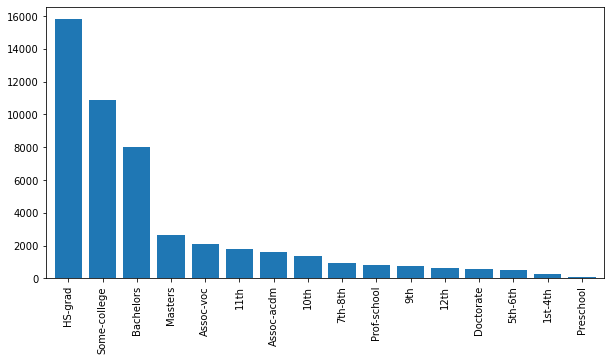

In [9]:
df["education"].value_counts().plot(kind='bar',width=0.8,figsize=(10, 5))

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

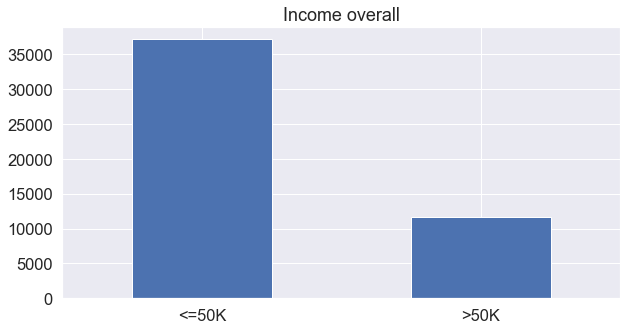

In [34]:
plt.figure(figsize=(10,5))
df["income"].value_counts().plot(kind='bar',width=0.5)
plt.title("Income overall")
plt.xticks(rotation=0)

In [23]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Text(0.5, 1.0, 'Income by gender')

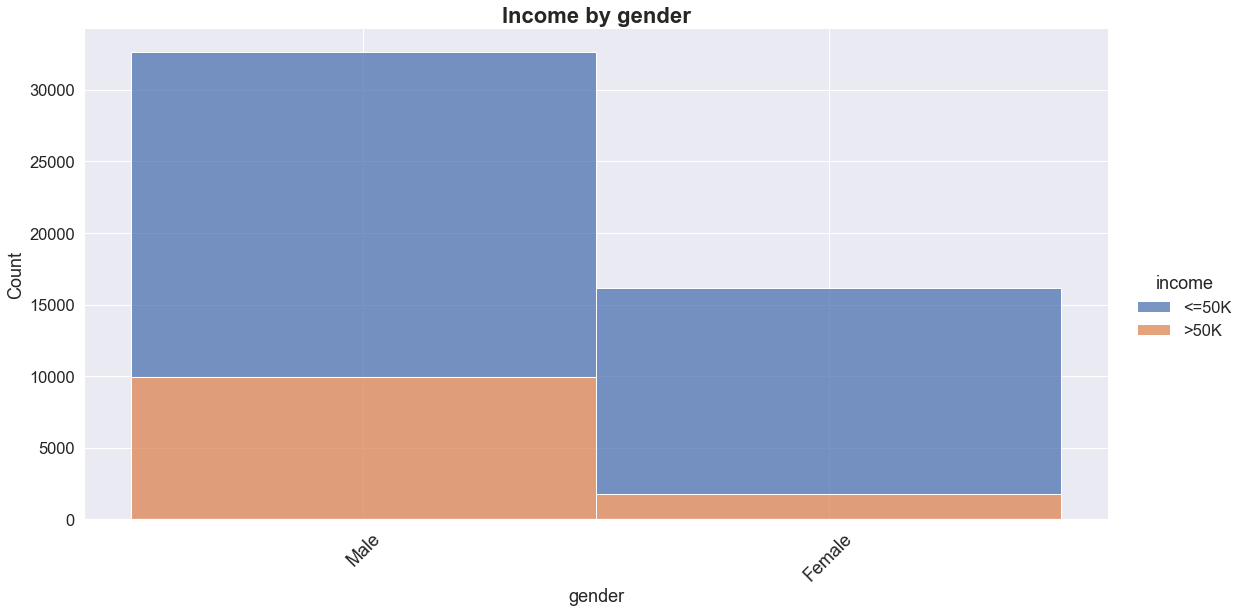

In [24]:
# gender_income plot

edu_plot = sns.displot(df, x=df["gender"], hue=df["income"], multiple='stack',height=8, aspect=2)
plt.xticks(rotation=45, fontsize=18)
plt.title("Income by gender",fontsize=22, fontweight="bold")

Text(0.5, 1.0, 'Income by different education level')

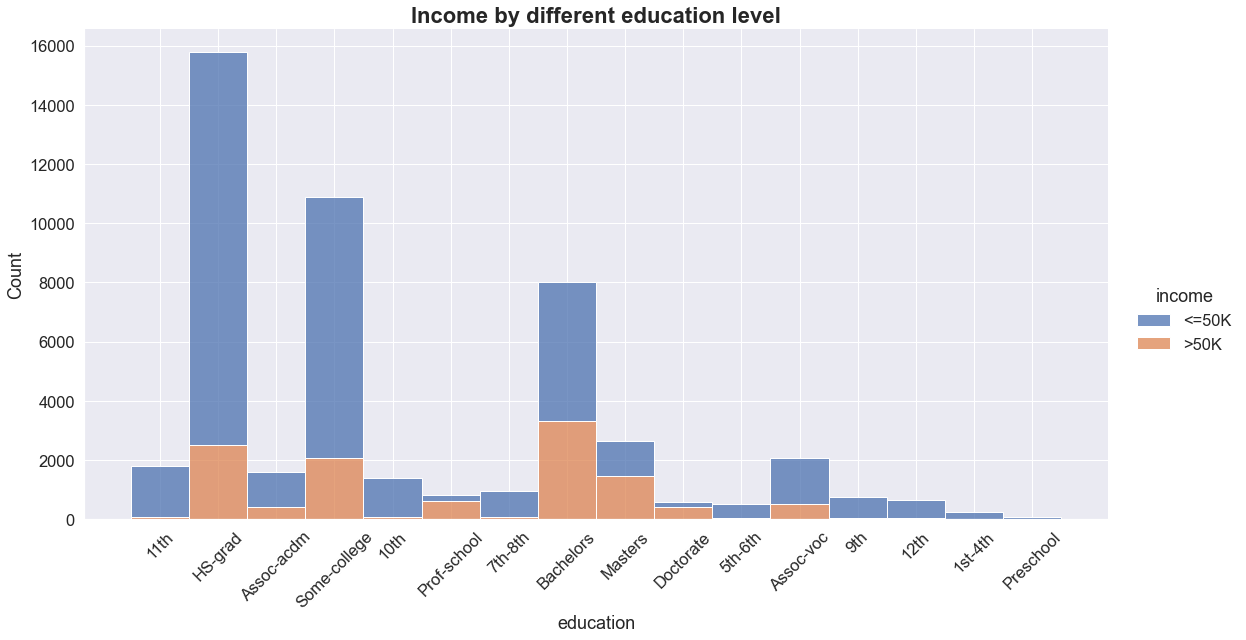

In [12]:
# education_income plot

sns.set(font_scale=1.5)
order_list = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", 
                "HS-grad", "Some-college", "Bachelors", "Masters", "Doctorate", "Prof-school", 
              "Assoc-acdm", "Assoc-voc"]

edu_plot = sns.displot(df, x=df["education"], hue=df["income"], multiple='stack',height=8, aspect=2,
                      row_order=df.sort_values("income").education)
plt.xticks(rotation=45)
plt.title("Income by different education level",fontsize=22, fontweight="bold")
# plt.set_xticklabels(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
#                 'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
#               'Assoc-acdm', 'Assoc-voc'])


C:\Users\lv164\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


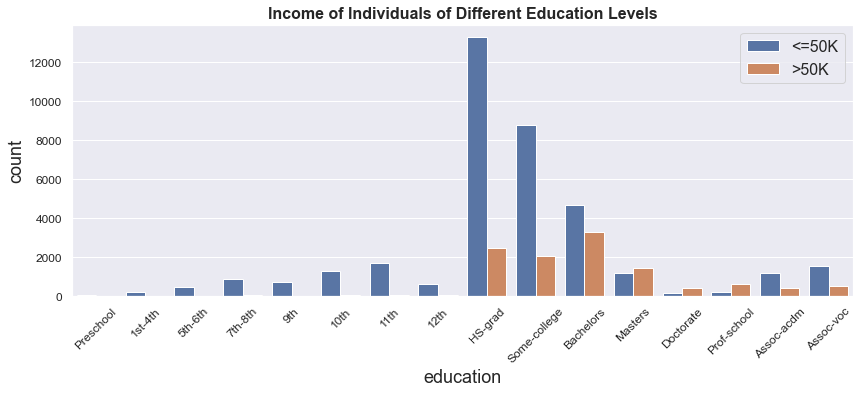

In [13]:
plt.figure(figsize=(14,5))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(df['education'], hue = df['income'], order = order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12,rotation = 45)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)

In [14]:
# define hours-per-week group

def hours_group(x):
    x = int(x)
    x = abs(x)
    if( x < 30 ):
        return "less than 30"
    if( 30 < x < 40 ):
        return "0-40"
    if( 40 < x < 50 ):
        return "40-50"
    if( 50 < x < 60 ):
        return "50-60"
    if( 60 < x < 70 ):
        return "60-70"
    if( 70 < x < 80 ):
        return "70-80"
    else:
        return "Greater than 80"

df["work_hours_group"] = df['hours-per-week'].apply(hours_group)

Text(0.5, 1.0, 'Income by different work hours per week')

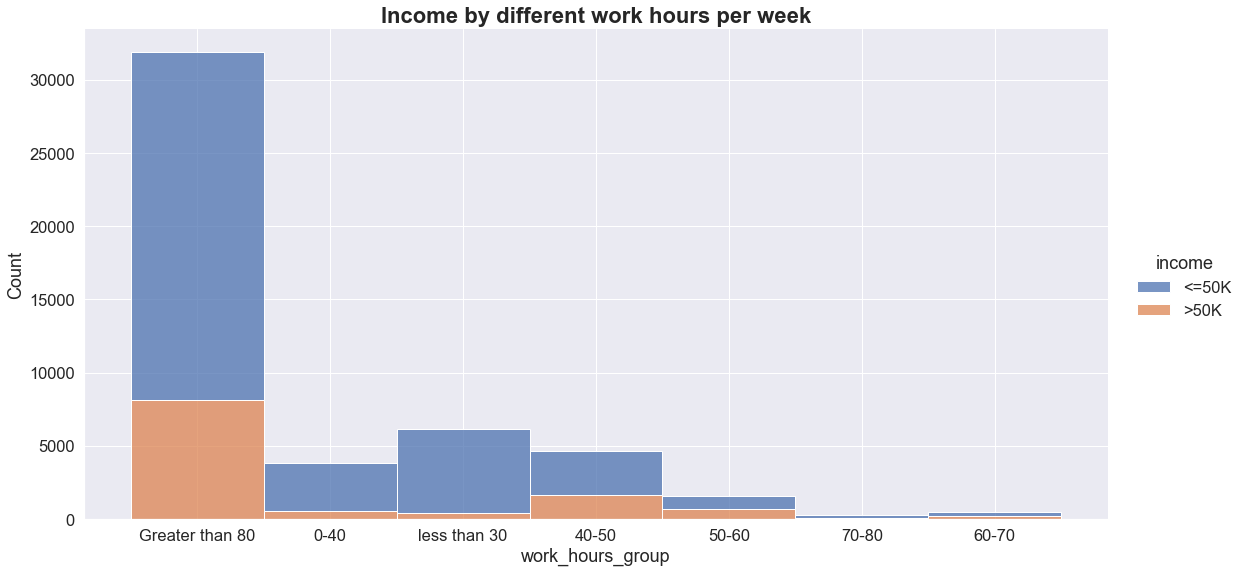

In [15]:
# hours-per-week and income plot

order_list = ["0-40", "40-50", "50-60", "60-70", "70-80","Greater than 80"]
edu_plot = sns.displot(df, x=df["work_hours_group"], hue=df["income"], multiple='stack',height=8, aspect=2)
plt.title("Income by different work hours per week",fontsize=22, fontweight="bold")

In [16]:
# define age_group

def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

Text(0.5, 1.0, 'Income by different age group')

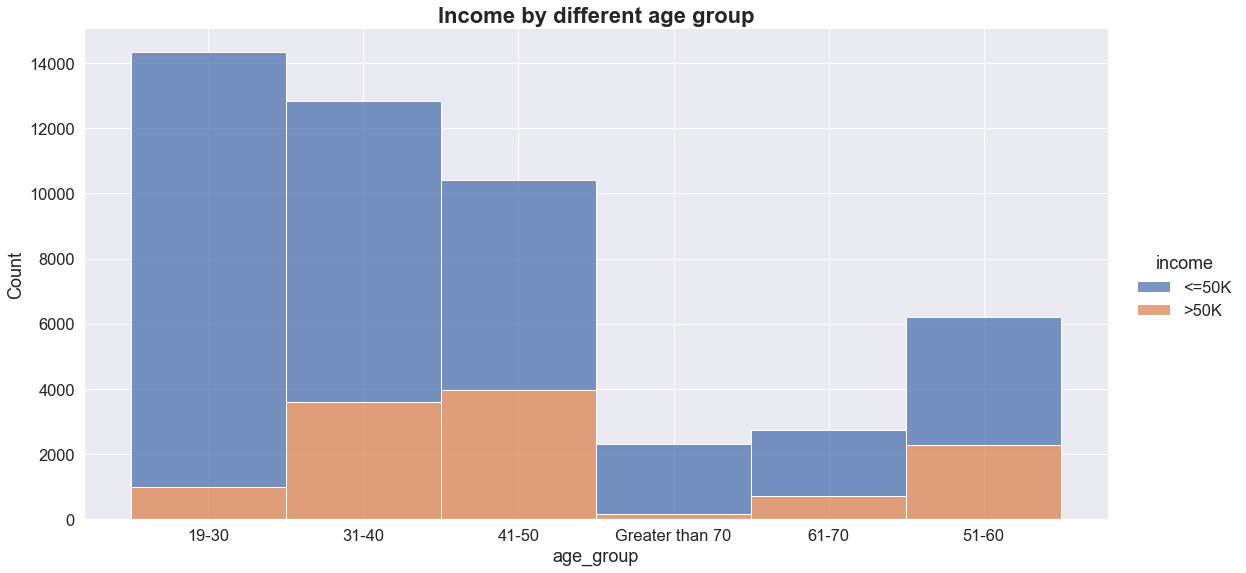

In [17]:
# age_income plot

edu_plot = sns.displot(df, x=df["age_group"], hue=df["income"], multiple='stack',height=8, aspect=2,
                      row_order=order_list)
plt.title("Income by different age group",fontsize=22, fontweight="bold")

Text(0.5, 1.0, 'Income by different occupation')

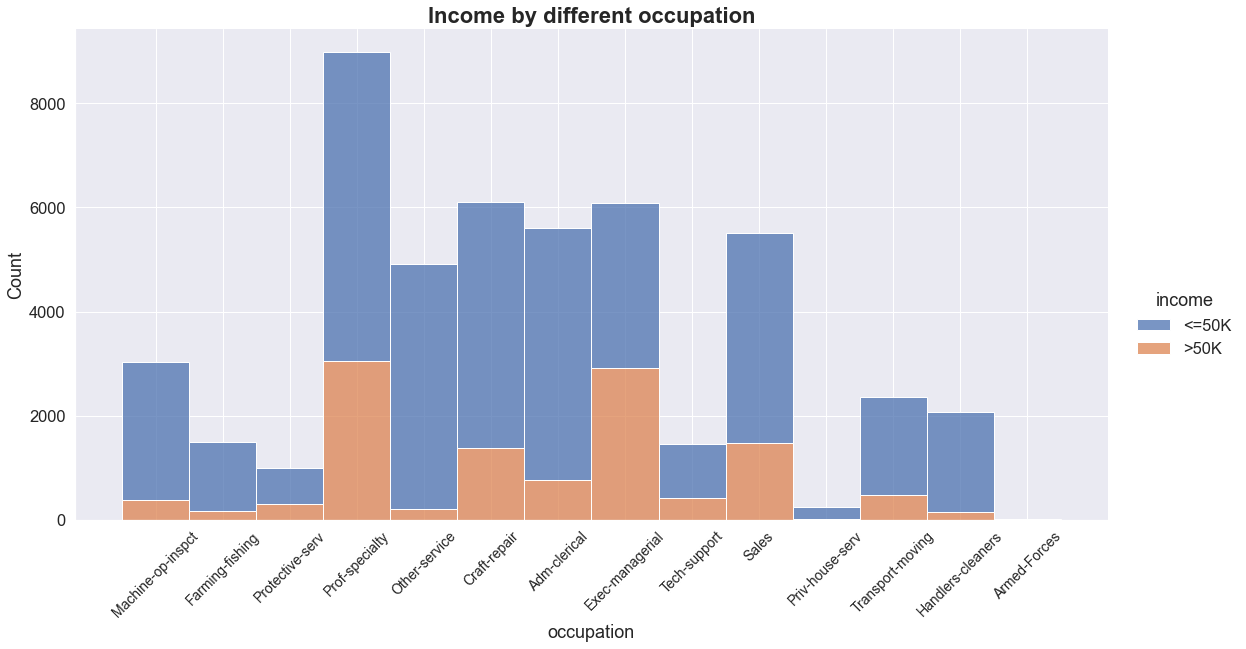

In [18]:
# occupation_income plot

edu_plot = sns.displot(df, x=df["occupation"], hue=df["income"], multiple='stack',height=8, aspect=2)
plt.xticks(rotation=45, fontsize=14)
plt.title("Income by different occupation",fontsize=22, fontweight="bold")

Text(0.5, 1.0, 'Income by different workclass')

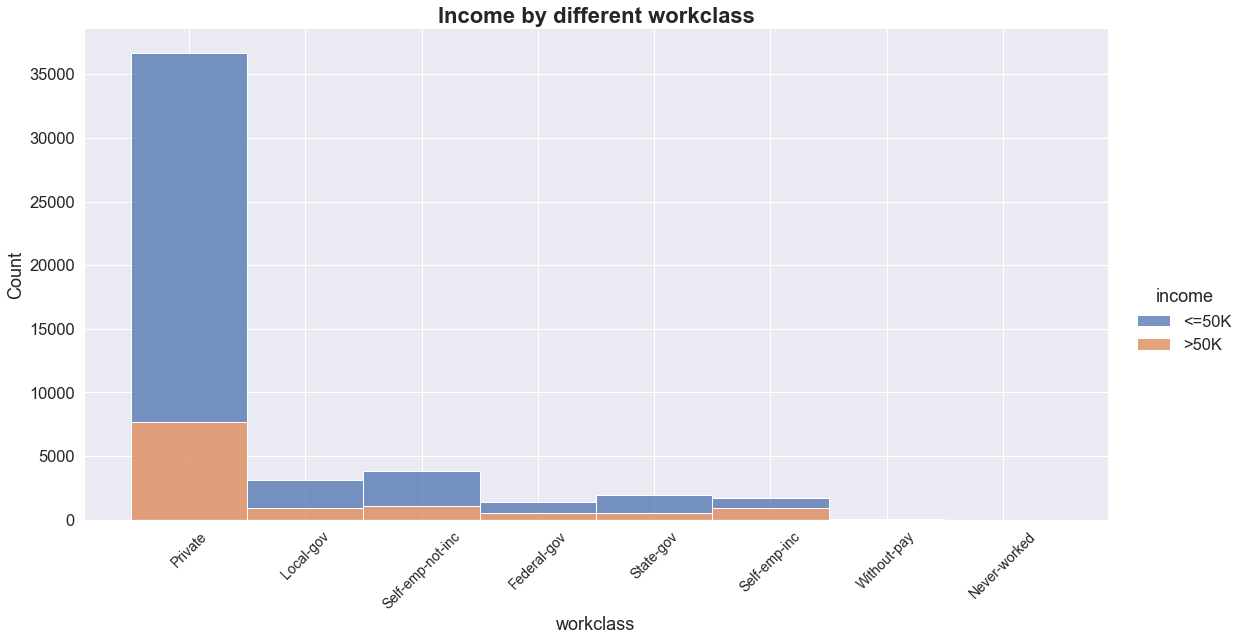

In [19]:
# workclass_income plot

edu_plot = sns.displot(df, x=df["workclass"], hue=df["income"], multiple='stack',height=8, aspect=2)
plt.xticks(rotation=45, fontsize=14)
plt.title("Income by different workclass",fontsize=22, fontweight="bold")

Text(0.5, 1.0, 'Income by race')

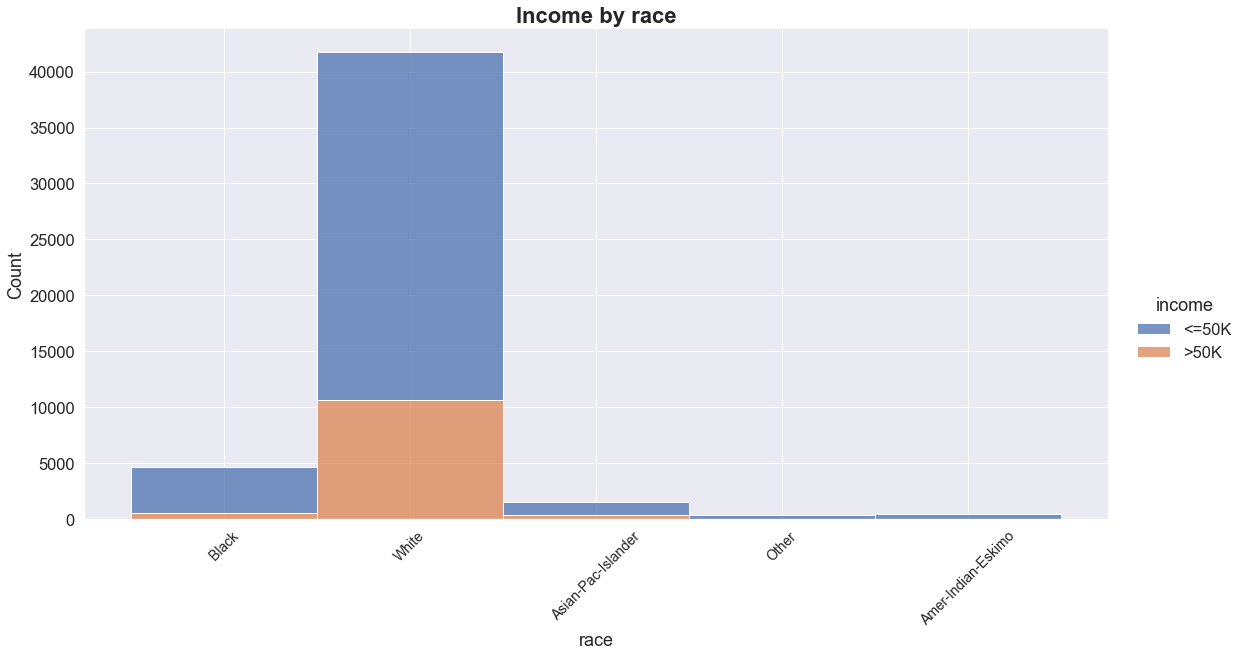

In [20]:
# race_income plot

edu_plot = sns.displot(df, x=df["race"], hue=df["income"], multiple='stack',height=8, aspect=2)
plt.xticks(rotation=45, fontsize=14)
plt.title("Income by race",fontsize=22, fontweight="bold")

Text(0.5, 1.0, 'Income by family')

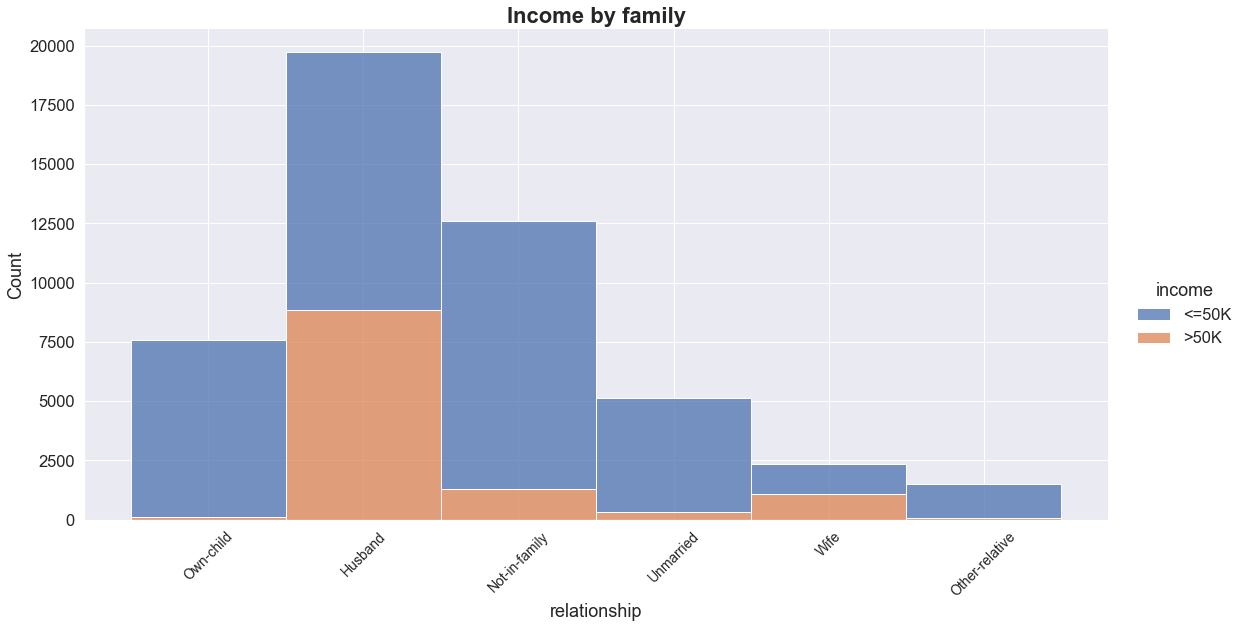

In [35]:
# relationship_income plot

edu_plot = sns.displot(df, x=df["relationship"], hue=df["income"], multiple='stack',height=8, aspect=2)
plt.xticks(rotation=45, fontsize=14)
plt.title("Income by family",fontsize=22, fontweight="bold")